# Assignment 1

In [11]:
name = "Artyom Nesterov" 
if name is None:
    raise ValueError("Put your full name in the `name` variable")

The objective of this assignment is to test a bunch of different topics we've discussed during our introductory classes. Complete the following exercises:

## Instructions

Complete the notebook and create a folder with your name, and put the notebook in that folder. Make a Pull Request with your code.

## Exercise 0

Write your own simple function with simple documentation and all types of arguments (positional, positional with defaults, arbitrary args, keyword args, arbitrary keyword args)

In [12]:
def jwtGenerator(secret, *scopes, alg="HS256", **payload):
    """
    Function to get data from users
    
    Parameters:
    secret (string): secret for jwt
    alg (int, optional): crypto algorithim for jwt
    *scopes: scopes for business logic
    **payload: playload for jwt

    Returns:
    dict: ready-to-use jwt, encoded using specific algorithm.
    """
    return {
        "secret": secret,
        "alg": alg,
        "scopes": scopes,
        "payload": payload,
    }

In [13]:
jwtGenerator("YtaERTSGdsfg", "email", "phone", "security", payload={"sub":"134141", "name":"Boba", "sso": "3242-23423-2342-23423"})

{'secret': 'YtaERTSGdsfg',
 'alg': 'HS256',
 'scopes': ('email', 'phone', 'security'),
 'payload': {'payload': {'sub': '134141',
   'name': 'Boba',
   'sso': '3242-23423-2342-23423'}}}

## Exercise 1


In [14]:
def is_prime(n):
    if n < 2:
        return False
    for i in range(2, int(n ** 0.5) + 1):
        if n % i == 0:
            return False
    return True

## Exercise 2

[Inspect](https://docs.python.org/3.7/library/inspect.html) will help you. Use `my_function` for tests.



In [15]:
import inspect

def inspect_function(func):
    """
    Takes another function as an argument (but not built-in) 
    and prints the following data:
    - The name of the analyzed function
    - The names of all the arguments it takes
    - Their types (positional, keyword, etc.)
    """
    if not callable(func) or inspect.isbuiltin(func):
        print("Cannot inspect built-in functions.")
        return

    signature = inspect.signature(func)
    print(f"Function Name: {func.__name__}")
    print("Arguments:")

    for name, param in signature.parameters.items():
        print(f"  - {name}: {param.kind}")

inspect_function(jwtGenerator)

Function Name: jwtGenerator
Arguments:
  - secret: POSITIONAL_OR_KEYWORD
  - scopes: VAR_POSITIONAL
  - alg: KEYWORD_ONLY
  - payload: VAR_KEYWORD


## Exercise 3

The `my_time_now` function is not working correctly. Correct it so that it displays the current time with a message. 

In [16]:
from datetime import datetime
from time import sleep
 
# wrong function
def my_time_now(msg):
    print(msg, datetime.now())
 


In [17]:
# simple tests :)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')
sleep(1)
my_time_now('The time is now: ')

The time is now:  2025-02-13 20:51:36.898680
The time is now:  2025-02-13 20:51:37.901481
The time is now:  2025-02-13 20:51:38.906781


## Exercise 4

In [18]:
def limit(input_generator, max_count):
    """
    Generator that returns not more than max_count values of the input_generator.
    """
    count = 0
    for value in input_generator:
        if count >= max_count:
            break
        yield value
        count += 1

def my_generator():
    for i in range(10):
        yield i

limited_gen = limit(my_generator(), 5)

for value in limited_gen:
    print(value)

0
1
2
3
4


## Exercise 5

Write a generator for an infinite sequence of numbers from the Pascal's triangle. The sequence look like this:
`1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 ... '

Test it with a generator from the previous task

In [19]:
def pascal_triangle():
    """
    Generator for an infinite sequence of numbers from Pascal's triangle.
    """
    row = [1]
    while True:
        yield from row
        # Generate the next row using the current row
        row = [1] + [row[i] + row[i + 1] for i in range(len(row) - 1)] + [1]

limited_pascal = limit(pascal_triangle(), 100)

for value in limited_pascal:
    print(value, end=' ')

1 1 1 1 2 1 1 3 3 1 1 4 6 4 1 1 5 10 10 5 1 1 6 15 20 15 6 1 1 7 21 35 35 21 7 1 1 8 28 56 70 56 28 8 1 1 9 36 84 126 126 84 36 9 1 1 10 45 120 210 252 210 120 45 10 1 1 11 55 165 330 462 462 330 165 55 11 1 1 12 66 220 495 792 924 792 495 220 66 12 1 1 13 78 286 715 1287 1716 1716 1287 

## Exercise 6


In [20]:
import pathlib  # can change to os module if you want
import sys

def files_sorted_by_size(path_to_dir):
    """
    Return a list of files in path_to_dir sorted by size.
    The same size files sorted alphabetically.
    """
    dir_path = pathlib.Path(path_to_dir)
    files = [(file.name, file.stat().st_size) for file in dir_path.iterdir() if file.is_file()]
    sorted_files = sorted(files, key=lambda f: (f[1], f[0]))
    return sorted_files

path = '../testFolterForAs1Ex6'
sorted_files = files_sorted_by_size(path)
for file_name, file_size in sorted_files:
    print(f"{file_name}: {file_size} bytes")

assignment_1.ipynb: 15243 bytes
assignment_2a.ipynb: 62720 bytes
assignment_2b.ipynb: 62720 bytes
assignment_2c.ipynb: 62720 bytes


## Exercise 7

Write a `merge_sorter` generator that merges sorted sequences of integers.

The generator takes an arbitrary number of arguments. The argument can be any iterable, including another generator. It is guaranteed that each argument is a sequence of integers, sorted in non-decreasing order.

In [21]:
import heapq

def merge_sorter(*args):
    yield from heapq.merge(*args)

seq1 = [1, 3, 5, 7]
seq2 = [2, 4, 6, 8]
seq3 = [0, 9, 10, 11]

merged_gen = merge_sorter(seq1, seq2, seq3)

print(list(merged_gen))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


## Exercise 8

Write the decorator `proﬁler`, which, when calling a function, will store in its attributes (not to be confused with arguments) the time of its execution (in seconds, it can be fractional) and the number of recursive calls that occurred during execution. Name the attributes `last_time_taken` and `calls`.
It is forbidden to use global variables.
The decorator must behave in a decent manner, that is, it must not overwrite the function's documentation.

For tests write [Ackermann function](https://en.wikipedia.org/wiki/Ackermann_function)

In [22]:
import time
import functools

def profiler():
    """
    A decorator that profiles a function by recording:
    - Execution time in `last_time_taken`
    - Number of recursive calls in `calls`
    """
    def decorator(func):
        @functools.wraps(func)  # Preserve function metadata
        def wrapper(*args, **kwargs):
            wrapper.calls += 1  # Count recursive calls

            start_time = time.perf_counter()
            result = func(*args, **kwargs)
            end_time = time.perf_counter()

            wrapper.last_time_taken = end_time - start_time
            return result

        # Initialize attributes
        wrapper.last_time_taken = 0
        wrapper.calls = 0

        return wrapper
    return decorator

@profiler()
def ackermann(n, m):
    if n == 0:
        return m + 1
    elif m == 0:
        return ackermann(n - 1, 1)
    else:
        return ackermann(n - 1, ackermann(n, m - 1))

print(ackermann(2, 3))

print(f"Time taken: {ackermann.last_time_taken:.6f} seconds")
print(f"Recursive calls: {ackermann.calls}")

9
Time taken: 0.000021 seconds
Recursive calls: 44


## Exercise 9

Write the function `encode` that implements [run-length encoding](https://en.wikipedia.org/wiki/Run-length_encoding) algorithm

In [23]:
def encode(sequence):
    if not sequence:
        return ""

    encoded = []
    count = 1

    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i - 1]:  
            count += 1
        else:
            encoded.append(f"{sequence[i - 1]}{count}")
            count = 1  

    encoded.append(f"{sequence[-1]}{count}")

    return "".join(encoded)

print(encode("AAAABBBCCDAA"))
print(encode("A"))
print(encode(""))

A4B3C2D1A2
A1



## Exercise 10

Write a decorator `visualizer` that takes a recursive function and will visualize the recursive calls that are made during the execution.
Consider using the `networkx` library or some other one in order to draw the recursion tree.
Test it with a recursive function that computes fibonacci.

Fibonacci result: 3


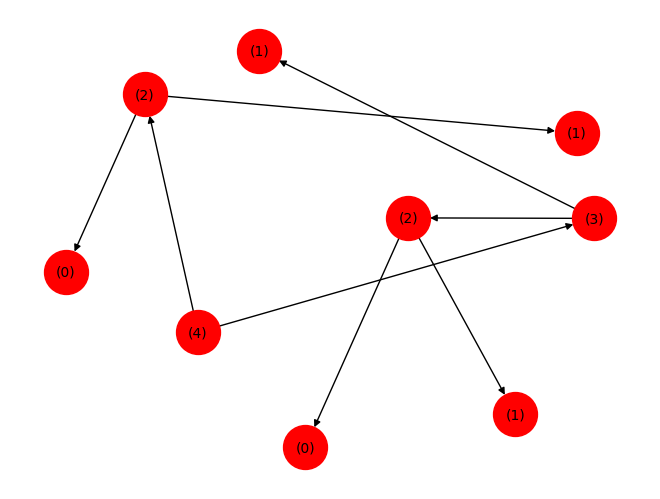

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import functools

def visualizer(func):
    call_graph = nx.DiGraph()
    call_stack = []

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        nonlocal call_graph, call_stack

        current_call_id = len(call_graph.nodes)
        call_graph.add_node(current_call_id, label=f"({args[0]})")

        if call_stack:
            parent_call_id = call_stack[-1]
            call_graph.add_edge(parent_call_id, current_call_id)

        call_stack.append(current_call_id)

        result = func(*args, **kwargs)

        call_stack.pop()

        return result

    def draw_graph():
        pos = nx.spring_layout(call_graph, k=2.0)
        labels = nx.get_node_attributes(call_graph, 'label')
        nx.draw(
            call_graph,
            pos,
            labels=labels,
            with_labels=True,
            node_size=1000,
            node_color='red',
            font_size=10,
            arrows=True,
        )
        plt.show()

    wrapper.draw_graph = draw_graph

    return wrapper

@visualizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)


print("Fibonacci result:", fibonacci(4))
fibonacci.draw_graph()

## Exercise 11

Now write a decorator `memoizer` that will do caching on the calls of a function (memoization). 
Decorate fibonacci with the decorators `memoizer`, `profiler` and `visualizer` at the same time (not necessarily in that order). Test that they're working as one would expect.

In [ ]:
def profiler2(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        wrapper.calls += 1

        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()

        wrapper.last_time_taken = end_time - start_time
        return result

    wrapper.last_time_taken = 0
    wrapper.calls = 0

    return wrapper

def memoizer(func):
    cache = {}

    @functools.wraps(func) 
    def wrapper(*args):
        if args in cache:
            return cache[args]
        result = func(*args)
        cache[args] = result
        return result

    return wrapper

Fibonacci result: 12586269025


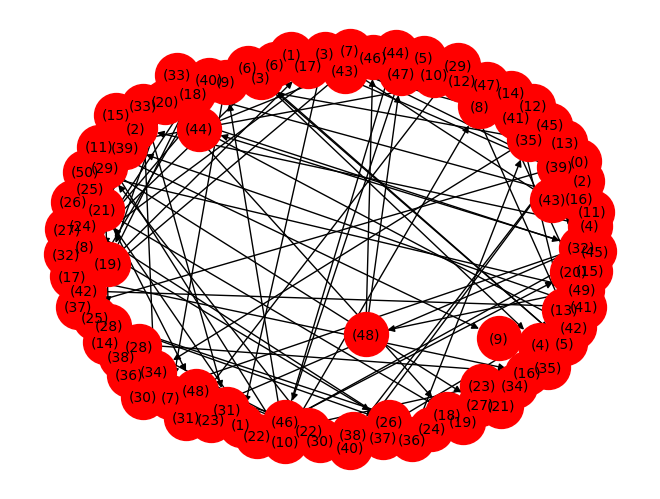

Time taken: 0.000238 seconds
Recursive calls: 99
Fibonacci result: 12586269025
Time taken: 0.000007 seconds


In [26]:
@profiler2
@visualizer
@memoizer
def fibonacci(n):
    if n == 0 or n == 1:
        return n
    return fibonacci(n - 1) + fibonacci(n - 2)

print("Fibonacci result:", fibonacci(50))
fibonacci.draw_graph()
print(f"Time taken: {fibonacci.last_time_taken:.6f} seconds")
print(f"Recursive calls: {fibonacci.calls}")

print("Fibonacci result:", fibonacci(50))
print(f"Time taken: {fibonacci.last_time_taken:.6f} seconds")

## Exercise 12

By using the `isinstance` method, check whether the following objects belong to the proposed types (hint: `isinstance`).

Visualize this correspondance matrix (object – type), e.g. using numpy and [pcolormesh](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html) for visualization.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# List of objects and types
list_of_objects = [
    int,
    2,
    2.,
    None,
    object,
    str,
    str(2.),
    float('2.0'),
    'hello',
    dict,
    list,
    [dict],
    {1: []}
]

list_of_types = [
    int,
    float,
    object,
    str,
    dict,
    list
]

correspondence_matrix = np.zeros((len(list_of_objects), len(list_of_types)), dtype=bool)

for i, obj in enumerate(list_of_objects):
    for j, type in enumerate(list_of_types):
        correspondence_matrix[i, j] = isinstance(obj, type)

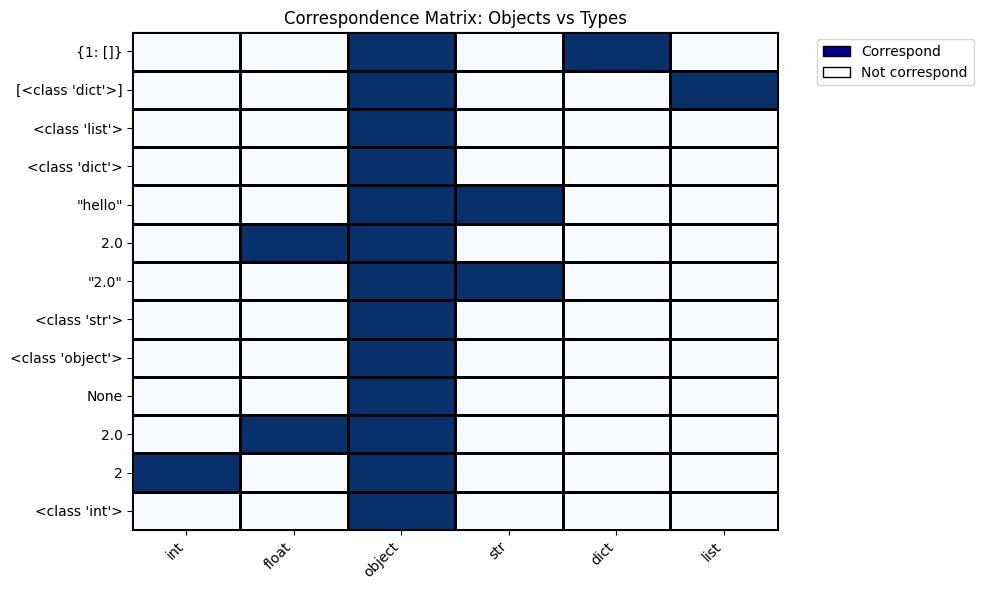

In [28]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the correspondence matrix
cax = ax.pcolormesh(correspondence_matrix, edgecolors='k', linewidth=1, cmap='Blues')

# Add labels for objects and types
ax.set_xticks(np.arange(len(list_of_types)) + 0.5)
ax.set_yticks(np.arange(len(list_of_objects)) + 0.5)
ax.set_xticklabels([t.__name__ for t in list_of_types], rotation=45, ha='right')

# Add quotes around string objects in yticklabels
yticklabels = []
for obj in list_of_objects:
    if isinstance(obj, str):
        yticklabels.append(f'"{obj}"')
    else:
        yticklabels.append(str(obj))
ax.set_yticklabels(yticklabels)

# Set aspect ratio to make cells rectangular
ax.set_aspect('auto')

# Create a legend
legend_elements = [
    Patch(facecolor='darkblue', edgecolor='k', label='Correspond'),
    Patch(facecolor='white', edgecolor='k', label='Not correspond')
]

# Move the legend outside the table
ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1))

# Add a title
plt.title("Correspondence Matrix: Objects vs Types")

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()
